In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import LabelEncoder  
from sklearn.linear_model import LogisticRegression


In [3]:
df_train = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt', sep=":::", header=None, engine='python')
df_test = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt', sep=":::", header=None, engine='python')

df_train.columns = ['SN', 'movie_name', 'category', 'confession']
df_test.columns = ['SN', 'movie_name', 'confession']


In [4]:
df_test.head()

,SN,movie_name,confession
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [5]:
df_train.head()

,SN,movie_name,category,confession
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54200 non-null  int64 
 1   movie_name  54200 non-null  object
 2   confession  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54214 non-null  int64 
 1   movie_name  54214 non-null  object
 2   category    54214 non-null  object
 3   confession  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [8]:
df_train.describe()

,SN
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [9]:
df_test.describe()

,SN
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [10]:
df_test.isnull().sum()

SN            0
movie_name    0
confession    0
dtype: int64

In [11]:
df_train.isnull().sum()

SN            0
movie_name    0
category      0
confession    0
dtype: int64

In [12]:
df_train.count()

SN            54214
movie_name    54214
category      54214
confession    54214
dtype: int64

In [13]:
df_test.count()

SN            54200
movie_name    54200
confession    54200
dtype: int64

In [14]:
df_train.iloc[0:3]

,SN,movie_name,category,confession
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...


In [15]:
df_train.loc[0]

SN                                                            1
movie_name                        Oscar et la dame rose (2009) 
category                                                 drama 
confession     Listening in to a conversation between his do...
Name: 0, dtype: object

In [16]:
df_test.shape

(54200, 3)

In [17]:
df_train.shape

(54214, 4)

Visualization of data

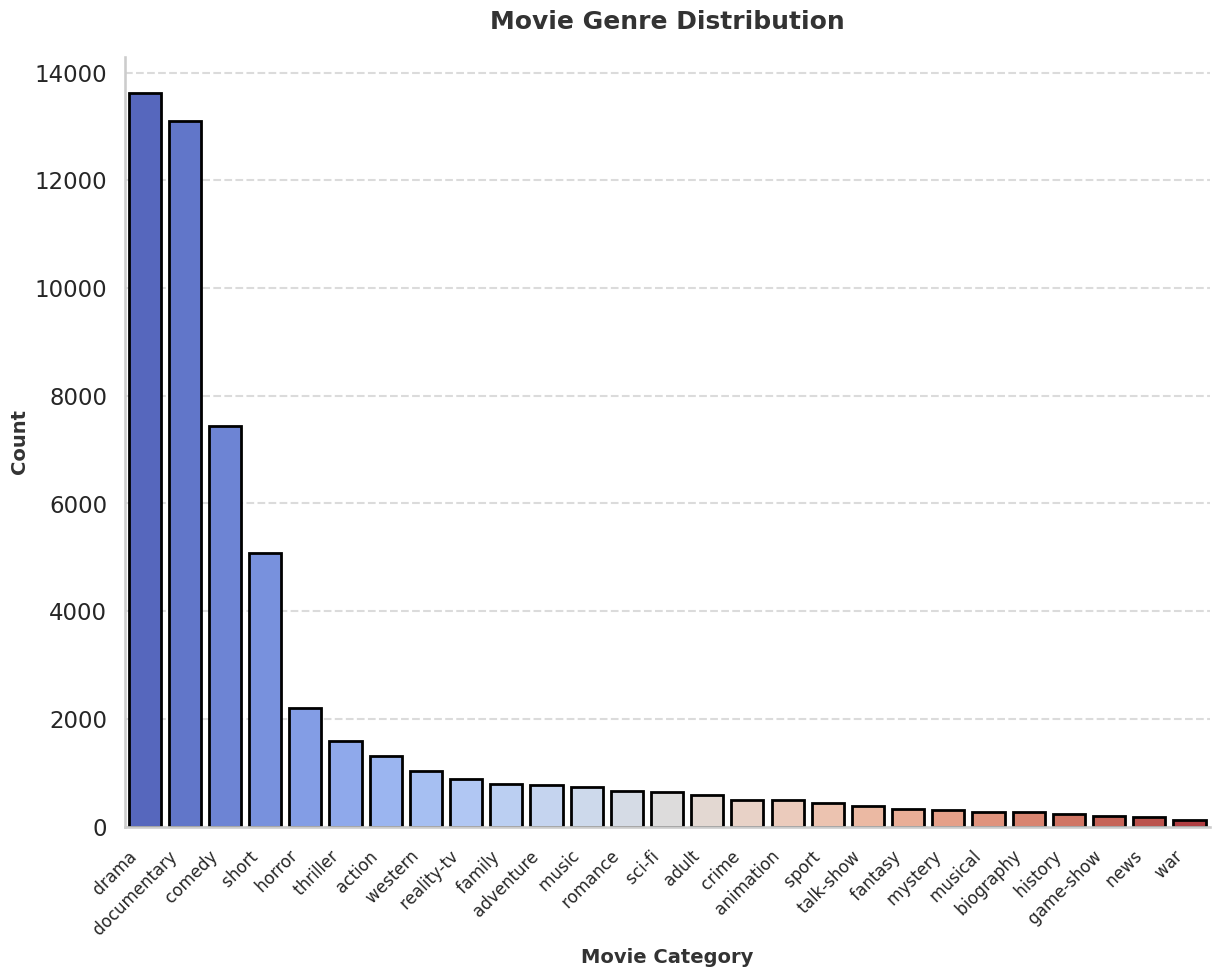

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern style for the plot
sns.set(style="whitegrid", context="talk", palette="muted")

# Set figure size
plt.figure(figsize=(14, 10))

# Customize the count plot
sns.countplot(x='category', data=df_train, 
              order=df_train['category'].value_counts().index,  # Sorting by count
              palette="coolwarm",  # A stylish color palette
              edgecolor='black',  # Add borders to bars
              linewidth=2)  # Border width

# Customize labels and title with stylish fonts and sizes
plt.xlabel('Movie Category', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='#333333')
plt.title('Movie Genre Distribution', fontsize=18, fontweight='bold', color='#333333', pad=20)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines to enhance readability
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)

# Remove top and right borders for a clean look
sns.despine()

# Display the plot
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


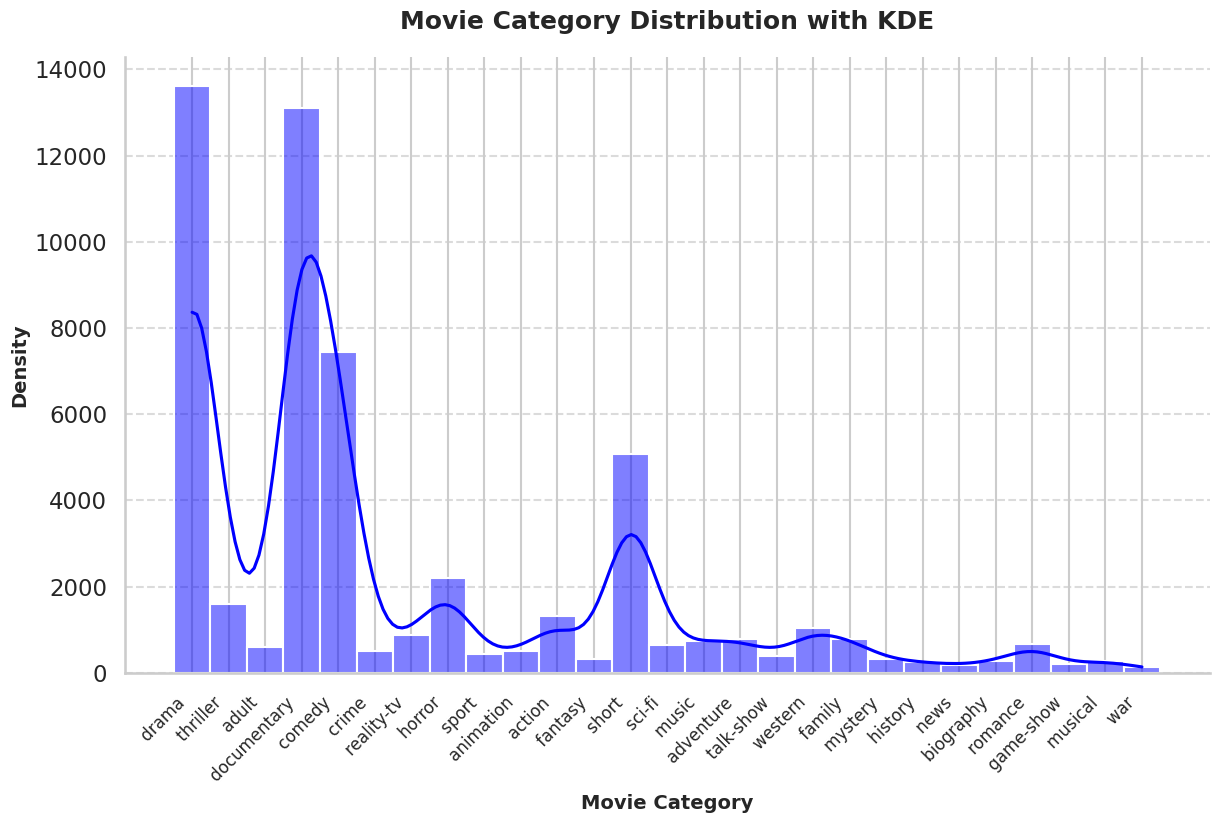

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size to make x-axis labels more readable
plt.figure(figsize=(14, 8))

# Create a distribution plot for the category with KDE
sns.histplot(df_train.category, kde=True, color="blue")

# Customize x-axis labels: rotating them for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Set axis labels and title
plt.xlabel('Movie Category', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.title('Movie Category Distribution with KDE', fontsize=18, fontweight='bold', pad=20)

# Add gridlines to enhance readability
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)

# Remove top and right borders for a clean look
sns.despine()

# Show the plot
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


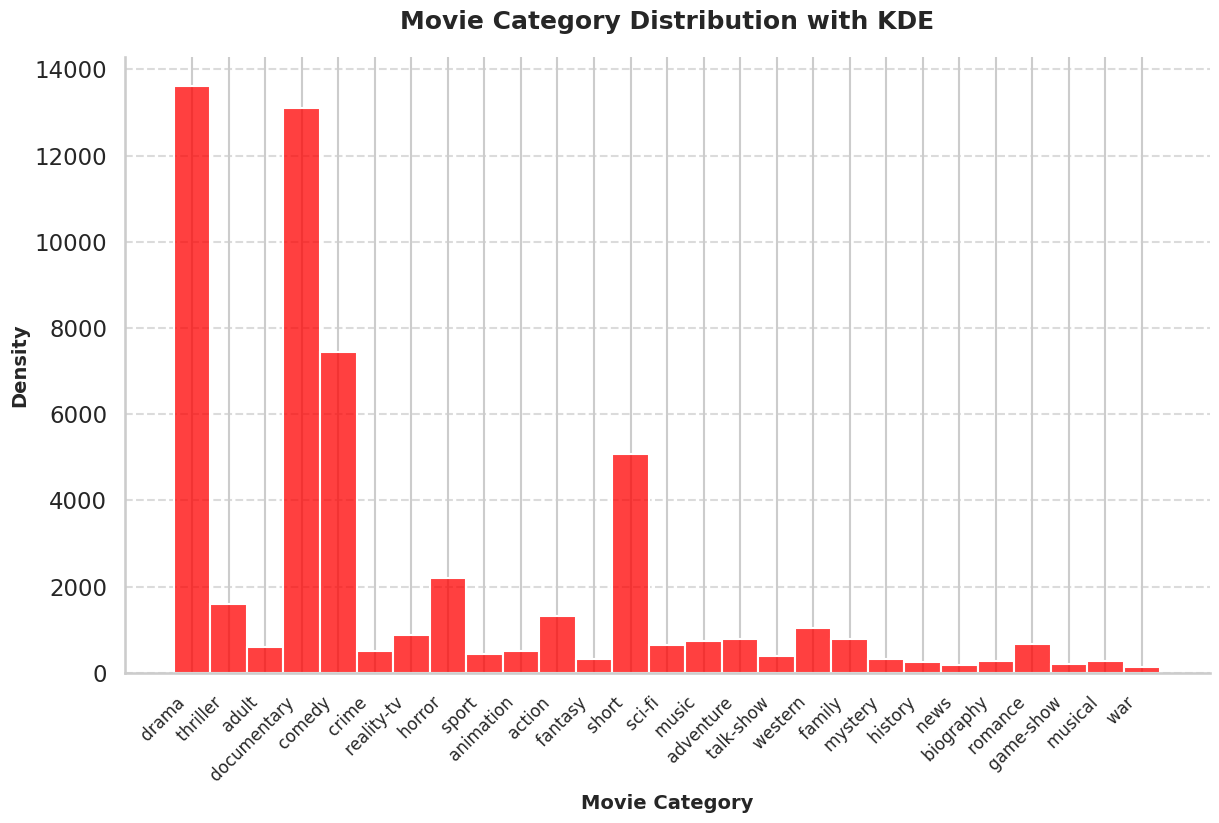

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size to make x-axis labels more readable
plt.figure(figsize=(14, 8))

# Create a distribution plot for the category with KDE
sns.histplot(df_train.category, kde=False, color="red")

# Customize x-axis labels: rotating them for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Set axis labels and title
plt.xlabel('Movie Category', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.title('Movie Category Distribution with KDE', fontsize=18, fontweight='bold', pad=20)

# Add gridlines to enhance readability
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)

# Remove top and right borders for a clean look
sns.despine()

# Show the plot
plt.show()


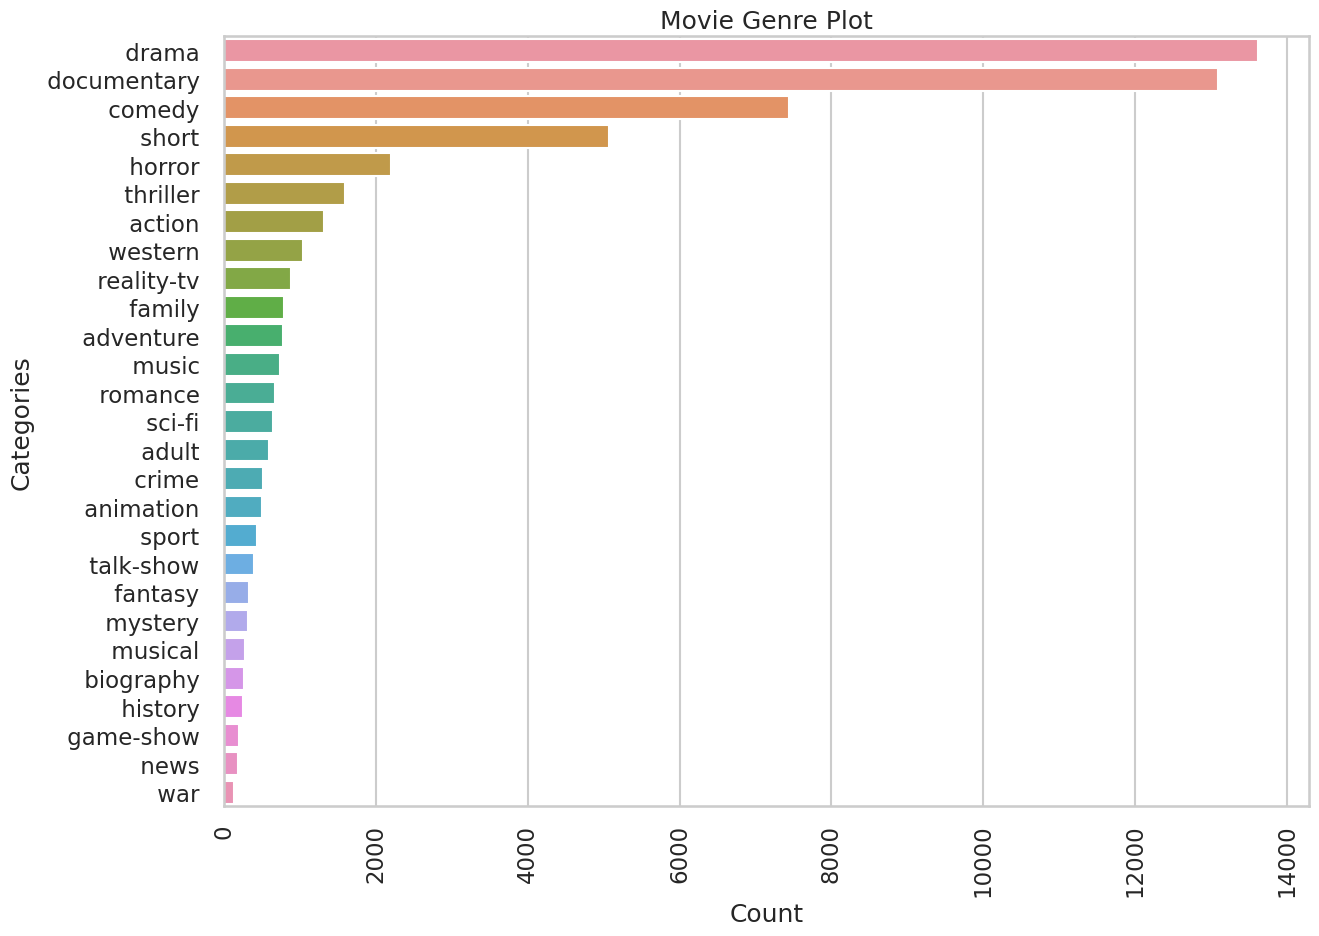

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
count1 = df_train['category'].value_counts()

# Seaborn barplot expects 'x' for values and 'y' for categories
sns.barplot(x=count1.values, y=count1.index, orient='h')

plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()


In [22]:
df_combined = pd.concat([df_train, df_test],axis = 0)

In [23]:
df_combined.head()

,SN,movie_name,category,confession
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [24]:
df_combined.shape

(108414, 4)

In [25]:
df_combined.size

433656

In [26]:
df_combined.isnull().any()

SN            False
movie_name    False
category       True
confession    False
dtype: bool

In [27]:
df_combined.count()

SN            108414
movie_name    108414
category       54214
confession    108414
dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_combined["category"] = encoder.fit_transform(df_combined["category"])


In [29]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_combined["category"] = encoder.fit_transform(df_combined["movie_name"])


In [30]:
df_combined.head()

,SN,movie_name,category,confession
0,1,Oscar et la dame rose (2009),70147,Listening in to a conversation between his do...
1,2,Cupid (1997),31219,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",107508,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),96121,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),97559,The film's title refers not only to the un-re...


In [31]:
# Fill missing values with the most frequent category (mode)
df_combined['category'] = df_combined['category'].fillna(df_combined['category'].mode()[0])


In [32]:
df_combined.count()

SN            108414
movie_name    108414
category      108414
confession    108414
dtype: int64

In [33]:
df_combined.duplicated().values.any()

False

Process the data


In [34]:
vectorizer = TfidfVectorizer()

In [35]:
x = vectorizer.fit_transform(df_combined["confession"])

In [36]:
df_combined.head()

,SN,movie_name,category,confession
0,1,Oscar et la dame rose (2009),70147,Listening in to a conversation between his do...
1,2,Cupid (1997),31219,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",107508,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),96121,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),97559,The film's title refers not only to the un-re...
